# Part 0: Set-up

In [ ]:
pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.9 MB/s eta 0:00:00


In [ ]:
pip install igviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/stats201-PS1-Ace/main/data/PS1-Network%20Analysis%20Referencescsv.csv")
df

Item type                                Authors  \
0  Journal Article                      Robles Carrillo M   
1  Journal Article                                 Cath C   
2  Journal Article               Jobin A,Ienca M,Vayena E   
3  Journal Article  Čartolovni A,Tomičić A,Lazić Mosler E   
4  Journal Article                              Gordon JS   

                                               Title  \
0        Artificial intelligence: From ethics to law   
1  Governing artificial intelligence: ethical, le...   
2       The global landscape of AI ethics guidelines   
3  Ethical, legal, and social considerations of A...   
4  AI and law: ethical, legal, and socio-politica...   

                                             Journal  Publication year  \
0                          Telecommunications Policy              2020   
1  Philosophical Transactions of the Royal Societ...              2018   
2                        Nature Machine Intelligence              2019   
3       International Journal of Medical Informatics              2022   
4                                       AI & SOCIETY              2021   

   Volume     Pages Date published  \
0    44.0    101937        07 2020   
1   376.0  20180080        10 2018   
2     1.0   389-399        09 2019   
3   161.0    104738        05 2022   
4     NaN       NaN        03 2021   

                                                URLs  \
0     http://dx.doi.org/10.1016/j.telpol.2020.101937   
1           http://dx.doi.org/10.1098/rsta.2018.0080   
2  https://www.nature.com/articles/s42256-019-008...   
3  https://www.sciencedirect.com/science/article/...   
4       http://dx.doi.org/10.1007/s00146-021-01194-0   

                              DOI  \
0    10.1016/j.telpol.2020.101937   
1          10.1098/rsta.2018.0080   
2       10.1038/s42256-019-0088-2   
3  10.1016/j.ijmedinf.2022.104738   
4      10.1007/s00146-021-01194-0   

                                            Abstract  
0  AI is the subject of a wide-ranging debate in ...  
1  This paper is the introduction to the special ...  
2  In the past five years, private companies, res...  
3  Recent developments in the field of Artificial...  
4  We live in interesting times. Humanity has wit...

# Part I The World Cloud

## 1.1. Title

In [ ]:
# Join the different processed titles together.
title = ','.join(list(df['Title'].values))
title

'Artificial intelligence: From ethics to law,Governing artificial intelligence: ethical, legal and technical opportunities and challenges,The global landscape of AI ethics guidelines,Ethical, legal, and social considerations of AI-based medical decision-support tools: A scoping review,AI and law: ethical, legal, and socio-political implications'

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop_words = stopwords.words('english')
stop_words.extend([',',"SoK","survey",":","A","on","in","into","the","for","review",])
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

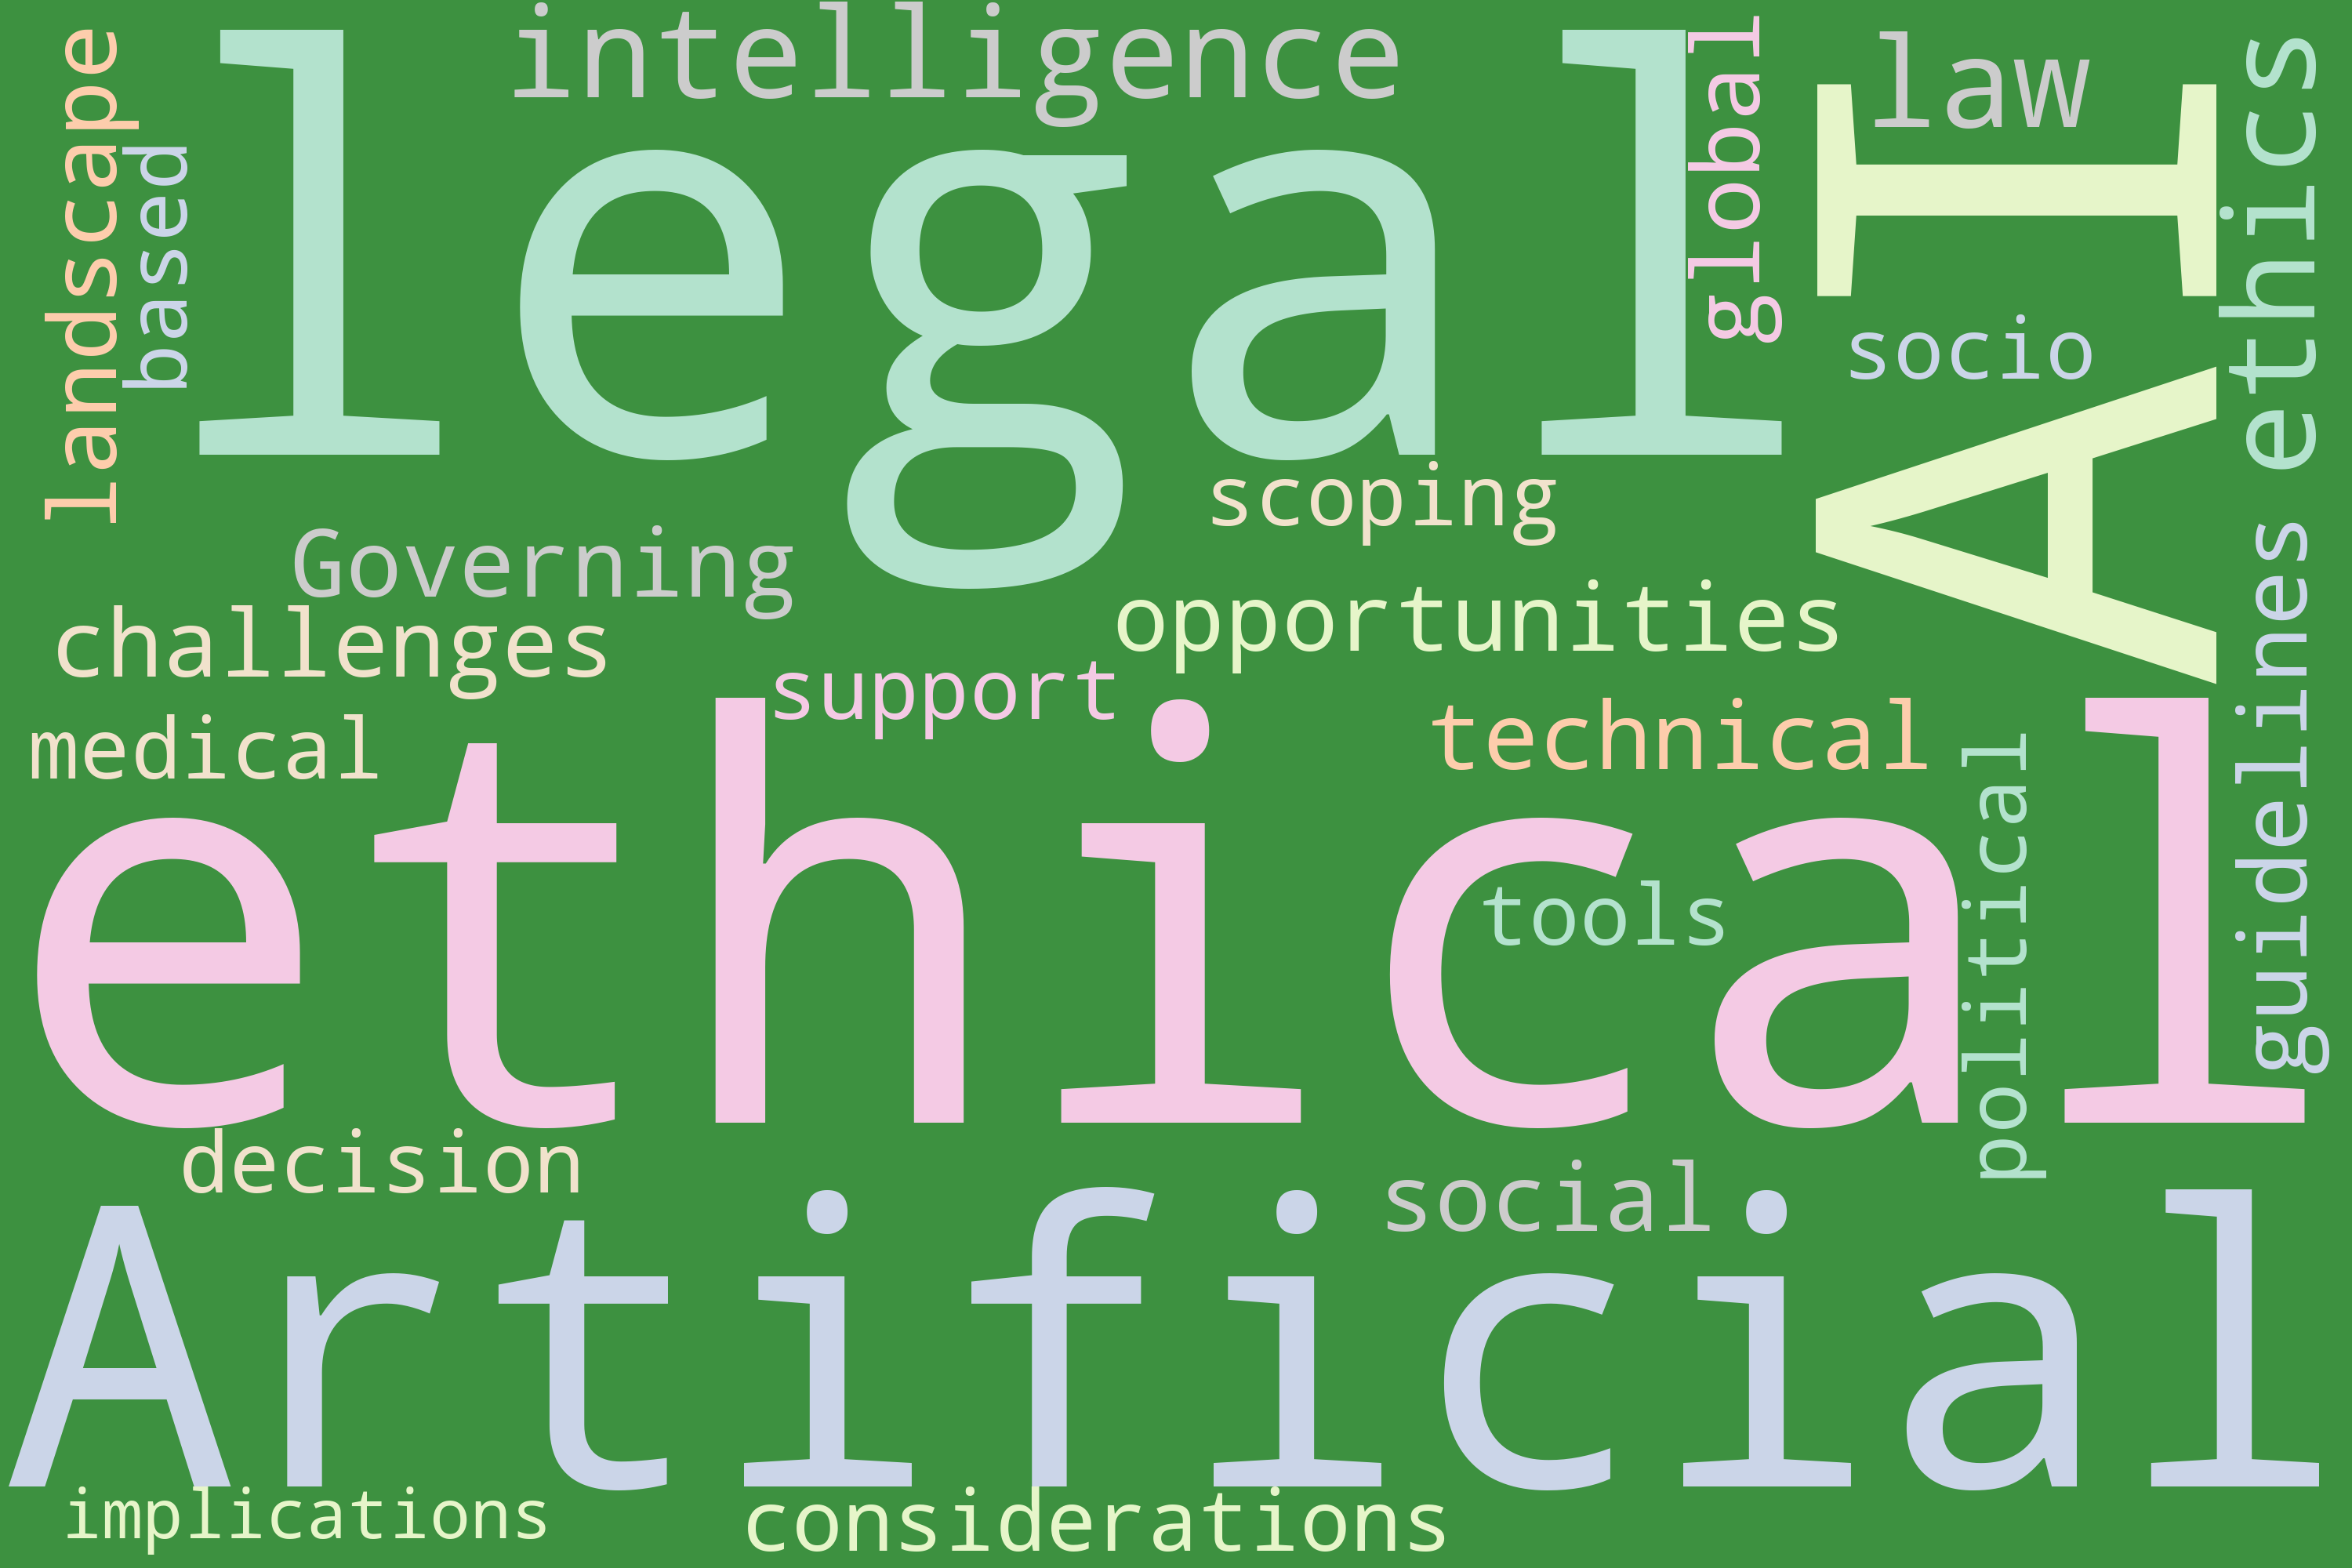

In [ ]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#3D9140', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(title)

# show the word cloud
wordcloud.to_image()

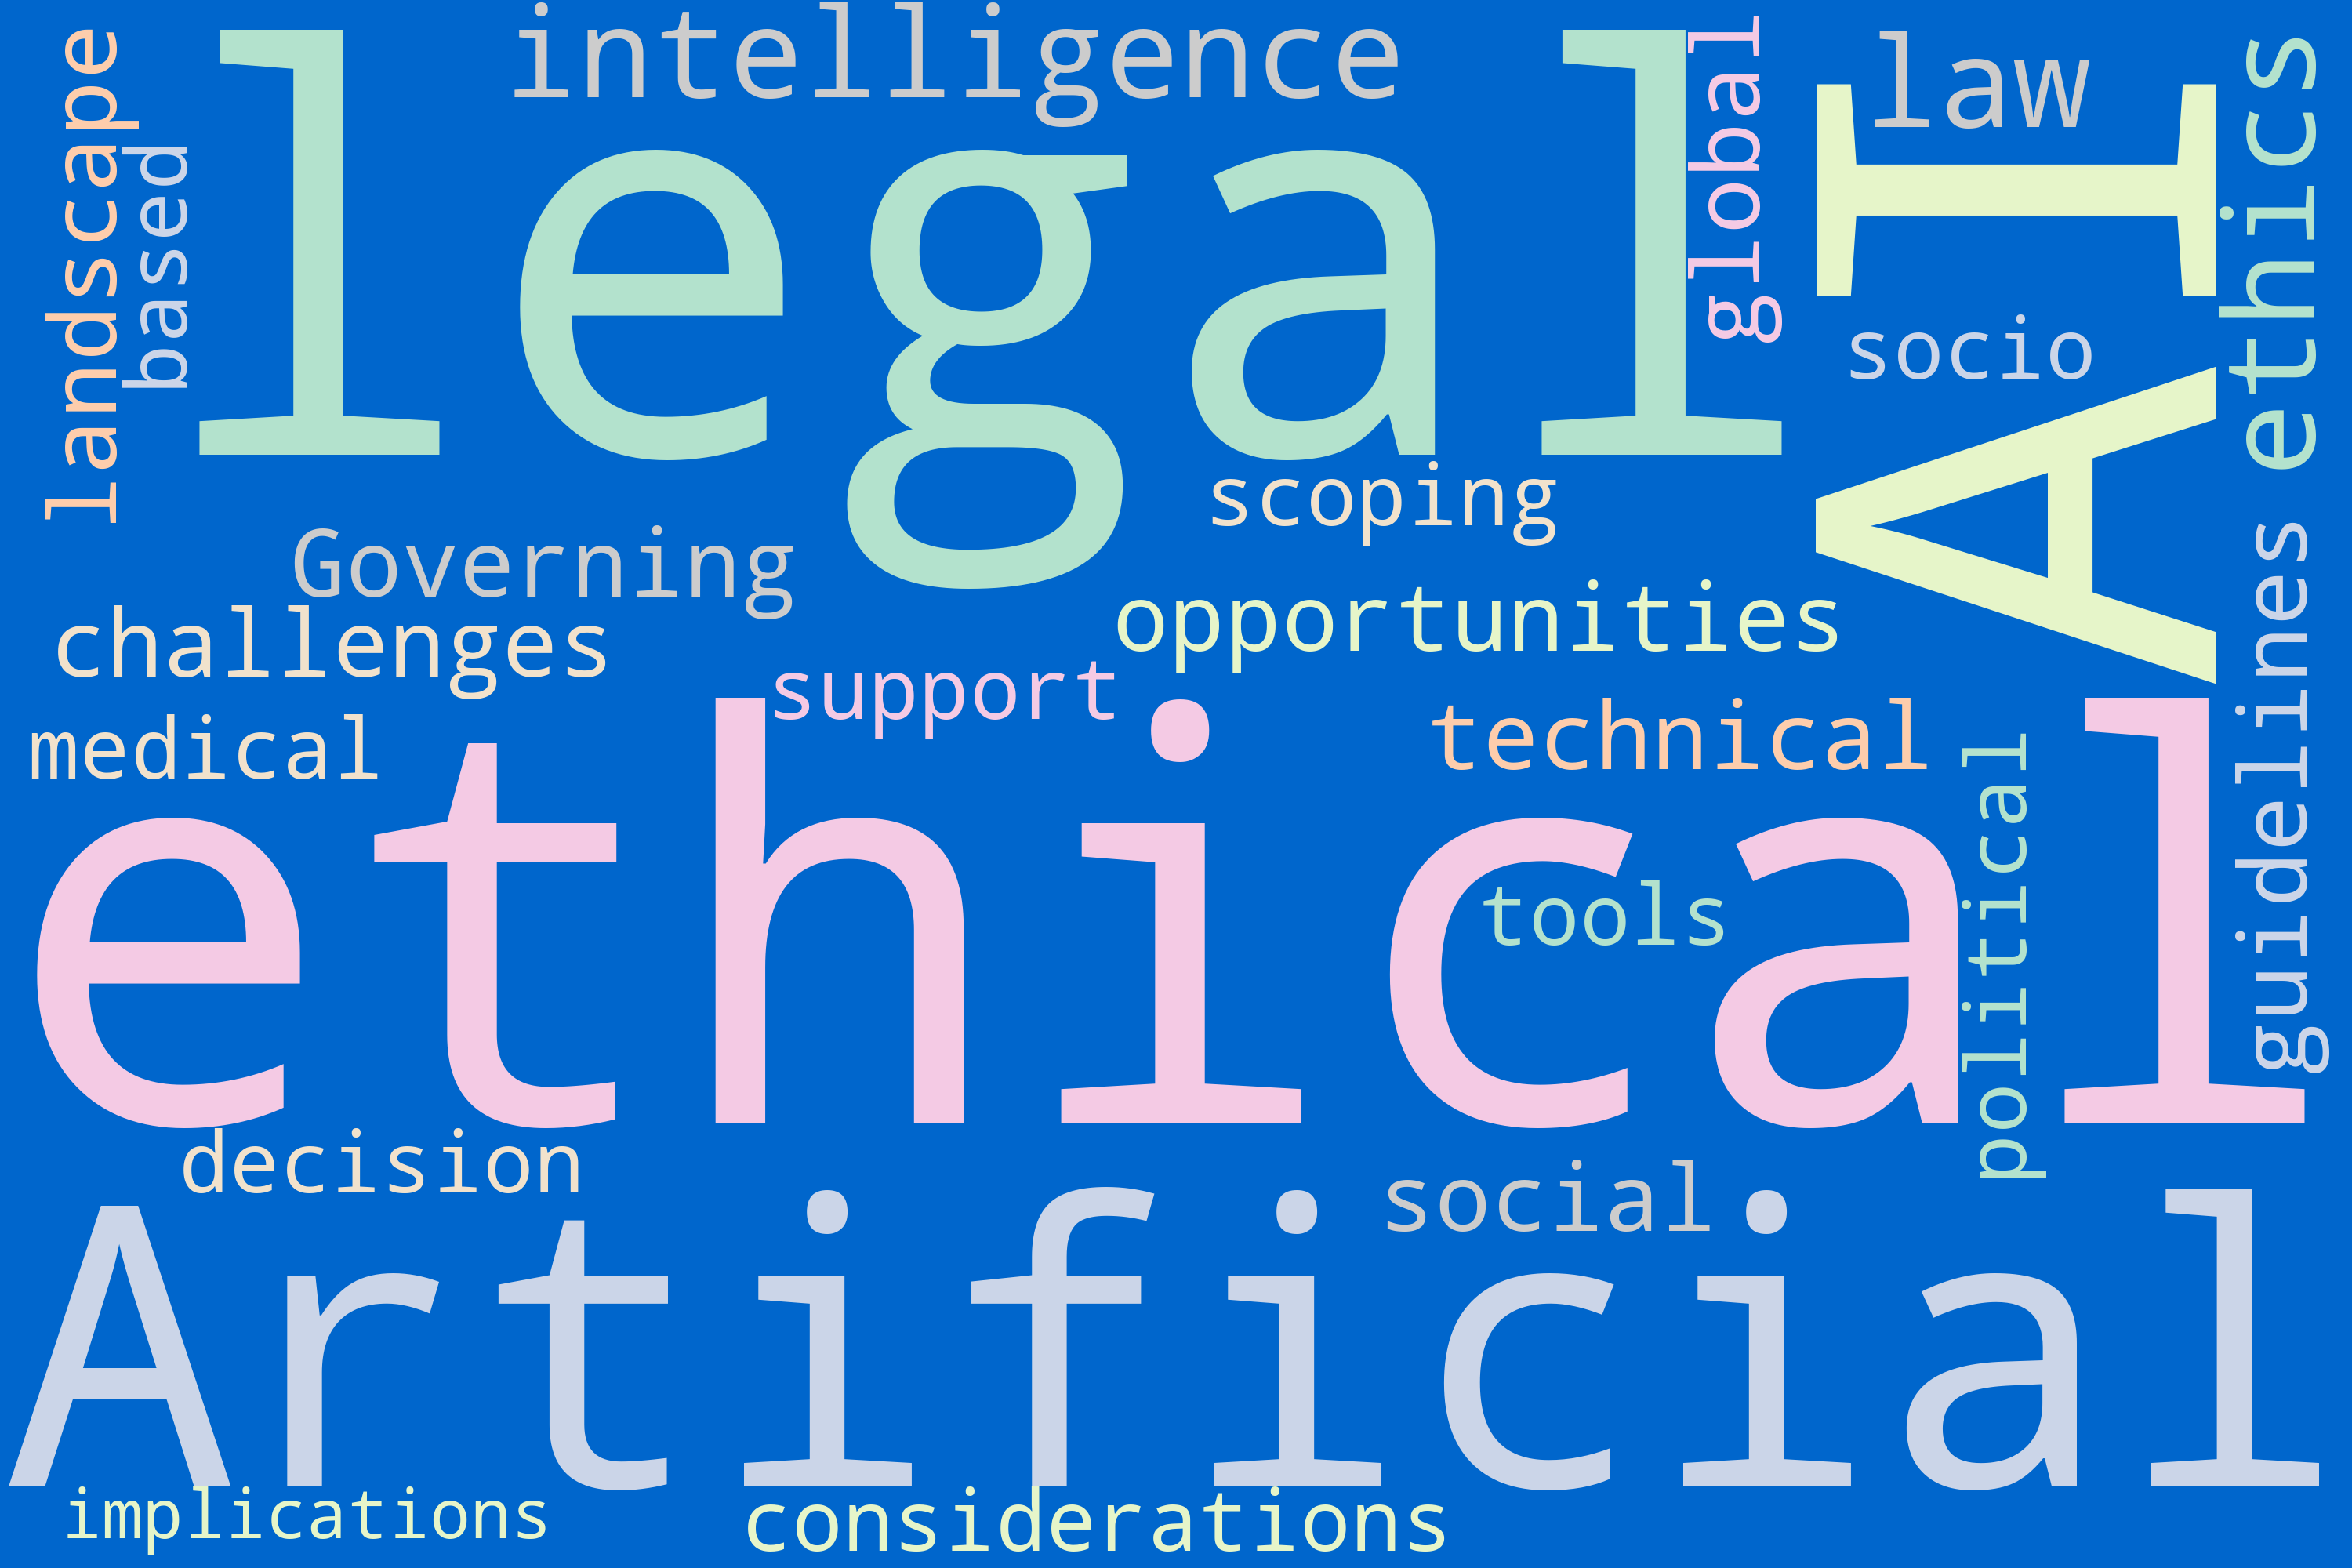

In [ ]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#0066CC', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(title)

# Show the word cloud
wordcloud.to_image()

## 1.2. Abstract

In [ ]:
# Join the different processed titles together.
Abstract = ','.join(list(df['Abstract'].values))
Abstract

"AI is the subject of a wide-ranging debate in which there is a growing concern about its ethical and legal aspects. Frequently, the two are mixed and confused despite being different issues and areas of knowledge. The ethical debate raises two main problems: the first, conceptual, relates to the idea and content of ethics; the second, functional, concerns its relationship with law. Both establish models of social behaviour, but they are different in scope and nature. The juridical analysis is based on a non-formalistic scientific methodology. This means that it is necessary to consider the nature and characteristics of the AI as a preliminary step to the definition of its legal paradigm. In this regard, there are two main issues: the relationship between artificial and human intelligence and the question of the unitary or diverse nature of the AI. From that theoretical and practical basis, the study of the legal system is carried out by examining its foundations, the governance model 

In [ ]:
stop_words = stopwords.words('english')
stop_words.extend(['.'])
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

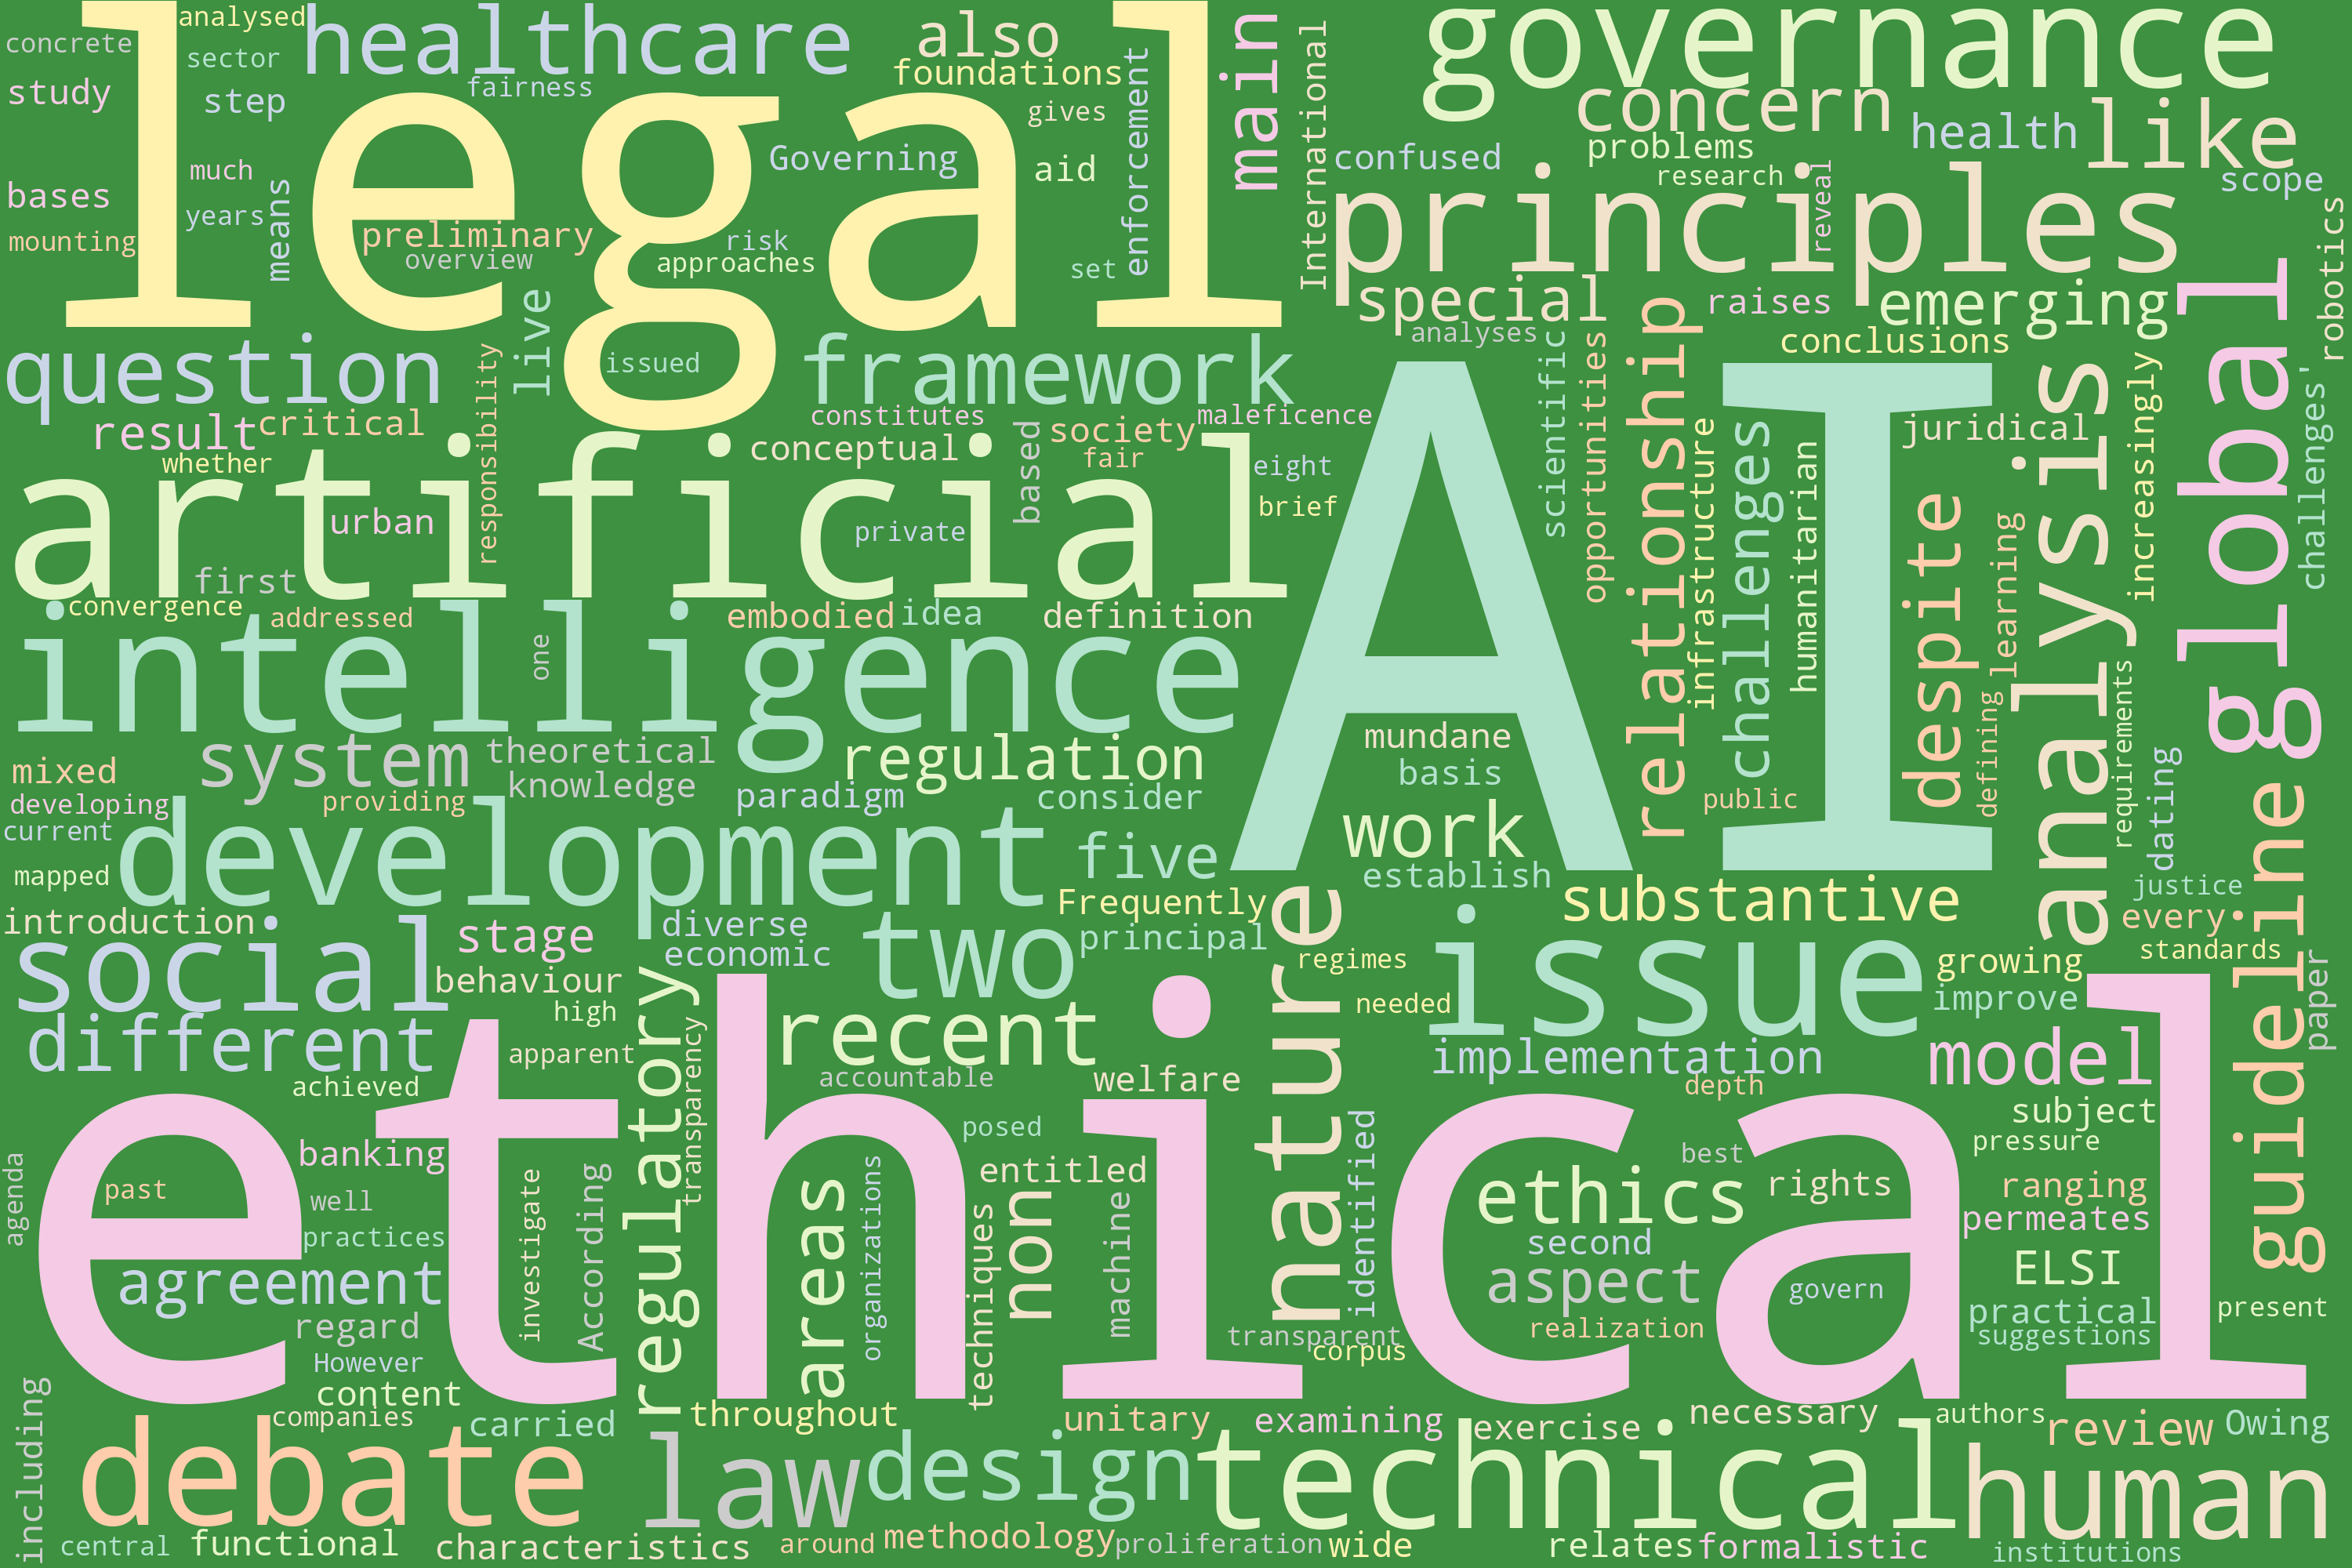

In [ ]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#3D9140', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(Abstract)

# show the word cloud
wordcloud.to_image()

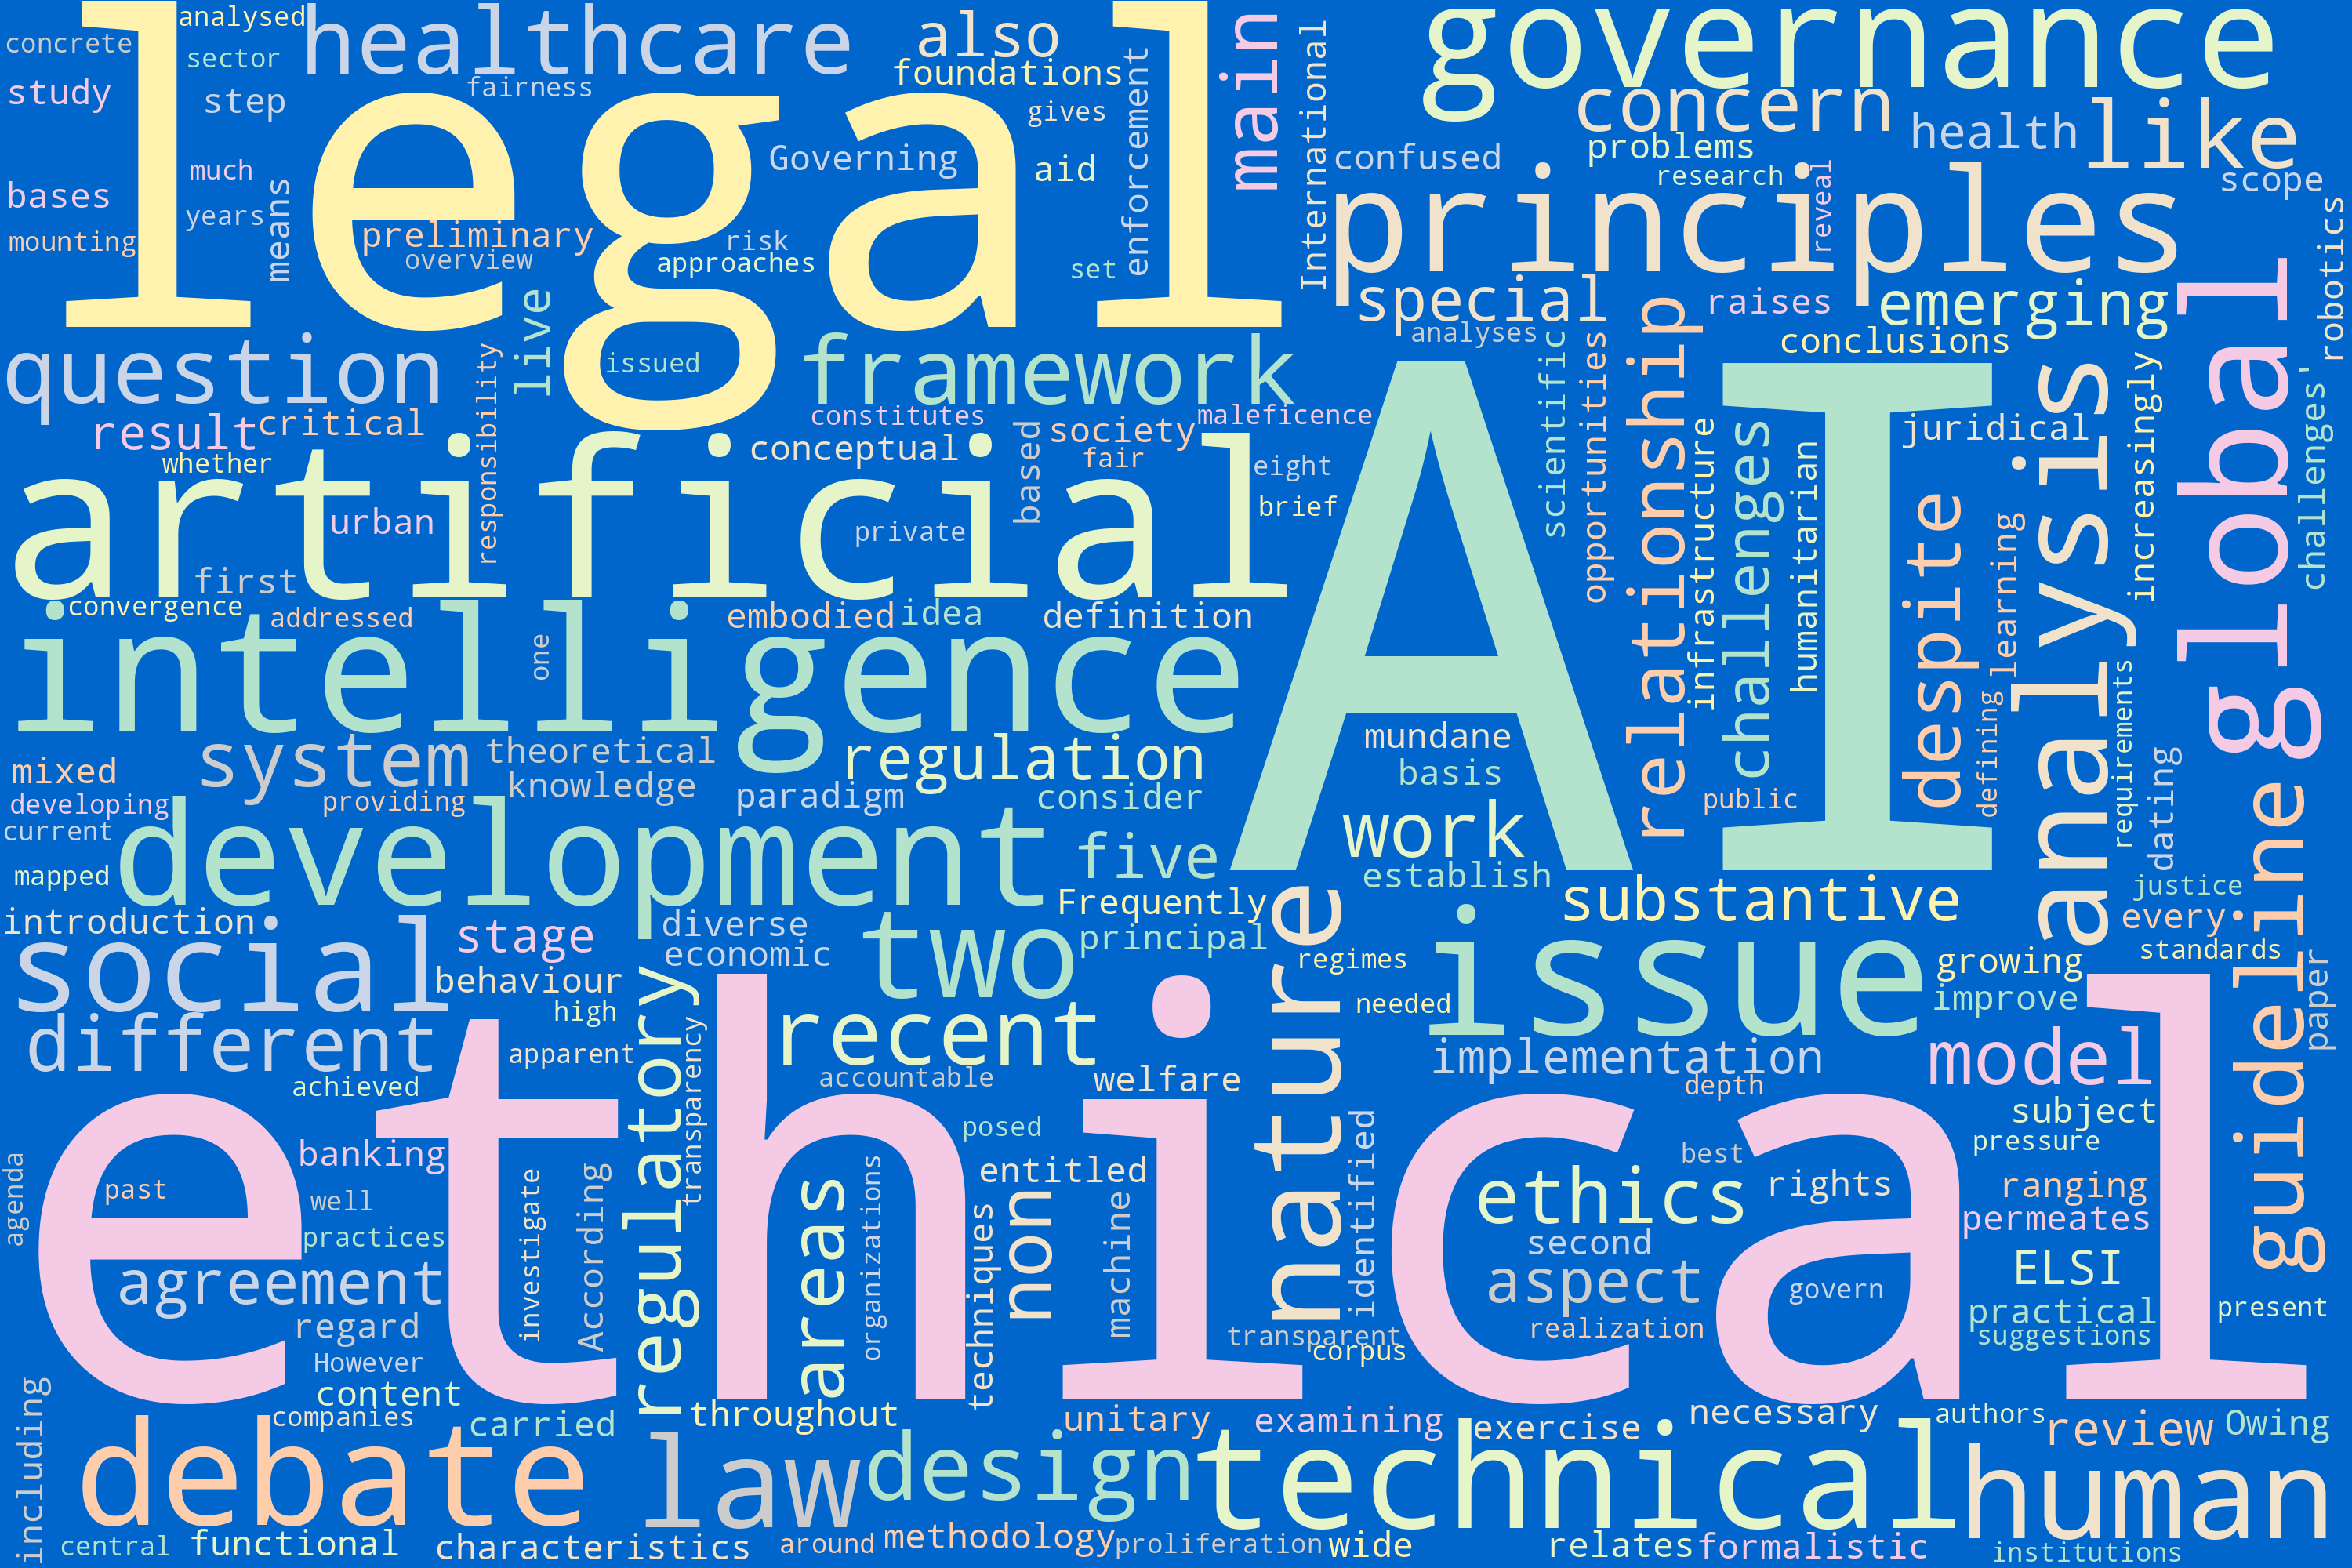

In [ ]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#0066CC', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(Abstract)

# Show the word cloud
wordcloud.to_image()

# Part II Bigram

## 2.1. Title

In [ ]:
df.columns

Index(['Item type', 'Authors', 'Title', 'Journal', 'Publication year',
       'Volume', 'Pages', 'Date published', 'URLs', 'DOI', 'Abstract'],
      dtype='object')

In [ ]:
import regex
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [ ]:
df_Title  = df['Title'].str.lower()

In [ ]:
Titles = ('. '.join(list(df_Title.values)))
Titles = regex.sub(r'\b[0-9]+\b\W*', '', Titles)
Titles = regex.sub(r'(?:^| )\w(?:$| )', ' ', Titles)
Titles =Titles.replace(":"," ")
Titles =Titles.replace("."," ")
Titles =Titles.replace("?"," ")
Titles =Titles.replace("("," ")
Titles =Titles.replace(")"," ")
Titles

'artificial intelligence  from ethics to law  governing artificial intelligence  ethical, legal and technical opportunities and challenges  the global landscape of ai ethics guidelines  ethical, legal, and social considerations of ai-based medical decision-support tools  scoping review  ai and law  ethical, legal, and socio-political implications'

In [ ]:
def remove_url(txt):
    url_pattern = regex.compile(r'https?://\S+|www\.\S+')
    no_url = url_pattern.sub(r'', txt)

    return no_url


def stem_tokens(tokens):
    stemmer = nltk.stem.PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens


def lemmatize_tokens(tokens):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

In [ ]:
text_no_urls = remove_url(Titles)
text_no_urls = text_no_urls.encode('utf-8', errors='ignore').decode('utf-8')
words_in_text = text_no_urls.split()

In [ ]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
import string

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
lemmatizer = WordNetLemmatizer()
words_nsw= [lemmatizer.lemmatize(w) for w in words_in_text]
words_nsw = [
    word for word in words_nsw if word not in string.punctuation]
words_nsw

['artificial',
 'intelligence',
 'from',
 'ethic',
 'to',
 'law',
 'governing',
 'artificial',
 'intelligence',
 'ethical,',
 'legal',
 'and',
 'technical',
 'opportunity',
 'and',
 'challenge',
 'the',
 'global',
 'landscape',
 'of',
 'ai',
 'ethic',
 'guideline',
 'ethical,',
 'legal,',
 'and',
 'social',
 'consideration',
 'of',
 'ai-based',
 'medical',
 'decision-support',
 'tool',
 'scoping',
 'review',
 'ai',
 'and',
 'law',
 'ethical,',
 'legal,',
 'and',
 'socio-political',
 'implication']

In [ ]:
stop_words = stopwords.words('english')
stop_words.extend([',','survey',':','A','on','in','into','the','for','review','.','SOK:','Sok:','(sok).'])
words_nsw = [word for word in words_nsw if not word in stop_words]
words_nsw = [ele for ele in words_nsw if len(ele) < 20]
words_nsw = [word for word in words_nsw if not word in ['An','SOK','How','sok']]
words_nsw

['artificial',
 'intelligence',
 'ethic',
 'law',
 'governing',
 'artificial',
 'intelligence',
 'ethical,',
 'legal',
 'technical',
 'opportunity',
 'challenge',
 'global',
 'landscape',
 'ai',
 'ethic',
 'guideline',
 'ethical,',
 'legal,',
 'social',
 'consideration',
 'ai-based',
 'medical',
 'decision-support',
 'tool',
 'scoping',
 'ai',
 'law',
 'ethical,',
 'legal,',
 'socio-political',
 'implication']

In [ ]:
import collections

In [ ]:
bigram = list(nltk.bigrams(words_nsw))
bigram_counts = collections.Counter(bigram).most_common(100)

In [ ]:
title_bigram=pd.DataFrame(bigram_counts)
title_bigram.columns = ['bigram', 'counts']
title_bigram = title_bigram.sort_values(by=['counts'], ascending=False)
title_bigram.head(20)

bigram  counts
0    (artificial, intelligence)       2
1            (ethical,, legal,)       2
15           (ethic, guideline)       1
27    (legal,, socio-political)       1
26              (law, ethical,)       1
25                    (ai, law)       1
24                (scoping, ai)       1
23              (tool, scoping)       1
22     (decision-support, tool)       1
21  (medical, decision-support)       1
20          (ai-based, medical)       1
19    (consideration, ai-based)       1
18      (social, consideration)       1
17             (legal,, social)       1
16        (guideline, ethical,)       1
14                  (ai, ethic)       1
13              (landscape, ai)       1
12          (global, landscape)       1
11          (challenge, global)       1
10     (opportunity, challenge)       1

In [ ]:
print(title_bigram.head(25).to_latex(index=False)) 

\begin{tabular}{lr}
\toprule
                     bigram &  counts \\
\midrule
 (artificial, intelligence) &       2 \\
         (ethical,, legal,) &       2 \\
         (ethic, guideline) &       1 \\
  (legal,, socio-political) &       1 \\
            (law, ethical,) &       1 \\
                  (ai, law) &       1 \\
              (scoping, ai) &       1 \\
            (tool, scoping) &       1 \\
   (decision-support, tool) &       1 \\
(medical, decision-support) &       1 \\
        (ai-based, medical) &       1 \\
  (consideration, ai-based) &       1 \\
    (social, consideration) &       1 \\
           (legal,, social) &       1 \\
      (guideline, ethical,) &       1 \\
                (ai, ethic) &       1 \\
            (landscape, ai) &       1 \\
        (global, landscape) &       1 \\
        (challenge, global) &       1 \\
   (opportunity, challenge) &       1 \\
   (technical, opportunity) &       1 \\
         (legal, technical) &       1 \\
          (ethical,

<ipython-input-80-d48c86c5ce71>:1: FutureWarning:

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.



In [ ]:
print(title_bigram.head(25).to_markdown(index=False))

| bigram                          |   counts |
|:--------------------------------|---------:|
| ('artificial', 'intelligence')  |        2 |
| ('ethical,', 'legal,')          |        2 |
| ('ethic', 'guideline')          |        1 |
| ('legal,', 'socio-political')   |        1 |
| ('law', 'ethical,')             |        1 |
| ('ai', 'law')                   |        1 |
| ('scoping', 'ai')               |        1 |
| ('tool', 'scoping')             |        1 |
| ('decision-support', 'tool')    |        1 |
| ('medical', 'decision-support') |        1 |
| ('ai-based', 'medical')         |        1 |
| ('consideration', 'ai-based')   |        1 |
| ('social', 'consideration')     |        1 |
| ('legal,', 'social')            |        1 |
| ('guideline', 'ethical,')       |        1 |
| ('ai', 'ethic')                 |        1 |
| ('landscape', 'ai')             |        1 |
| ('global', 'landscape')         |        1 |
| ('challenge', 'global')         |        1 |
| ('opportuni

In [ ]:
title_bigram.to_csv("title_bigram.csv")

In [ ]:
import networkx as nx

In [ ]:
G = nx.Graph()
for edge in bigram_counts:
    link = edge[0]
    count = edge[1]
    
    G.add_edge(link[0], link[1], weight=count)

In [ ]:
# Create dictionary of bigrams and their counts
d = title_bigram.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()
# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=v/10000)
G.remove_nodes_from(["pfv", "tag"])

In [ ]:
G = nx.Graph()
for edge in bigram_counts:
    link = edge[0]
    count = edge[1]
    
    G.add_edge(link[0], link[1], weight=count)

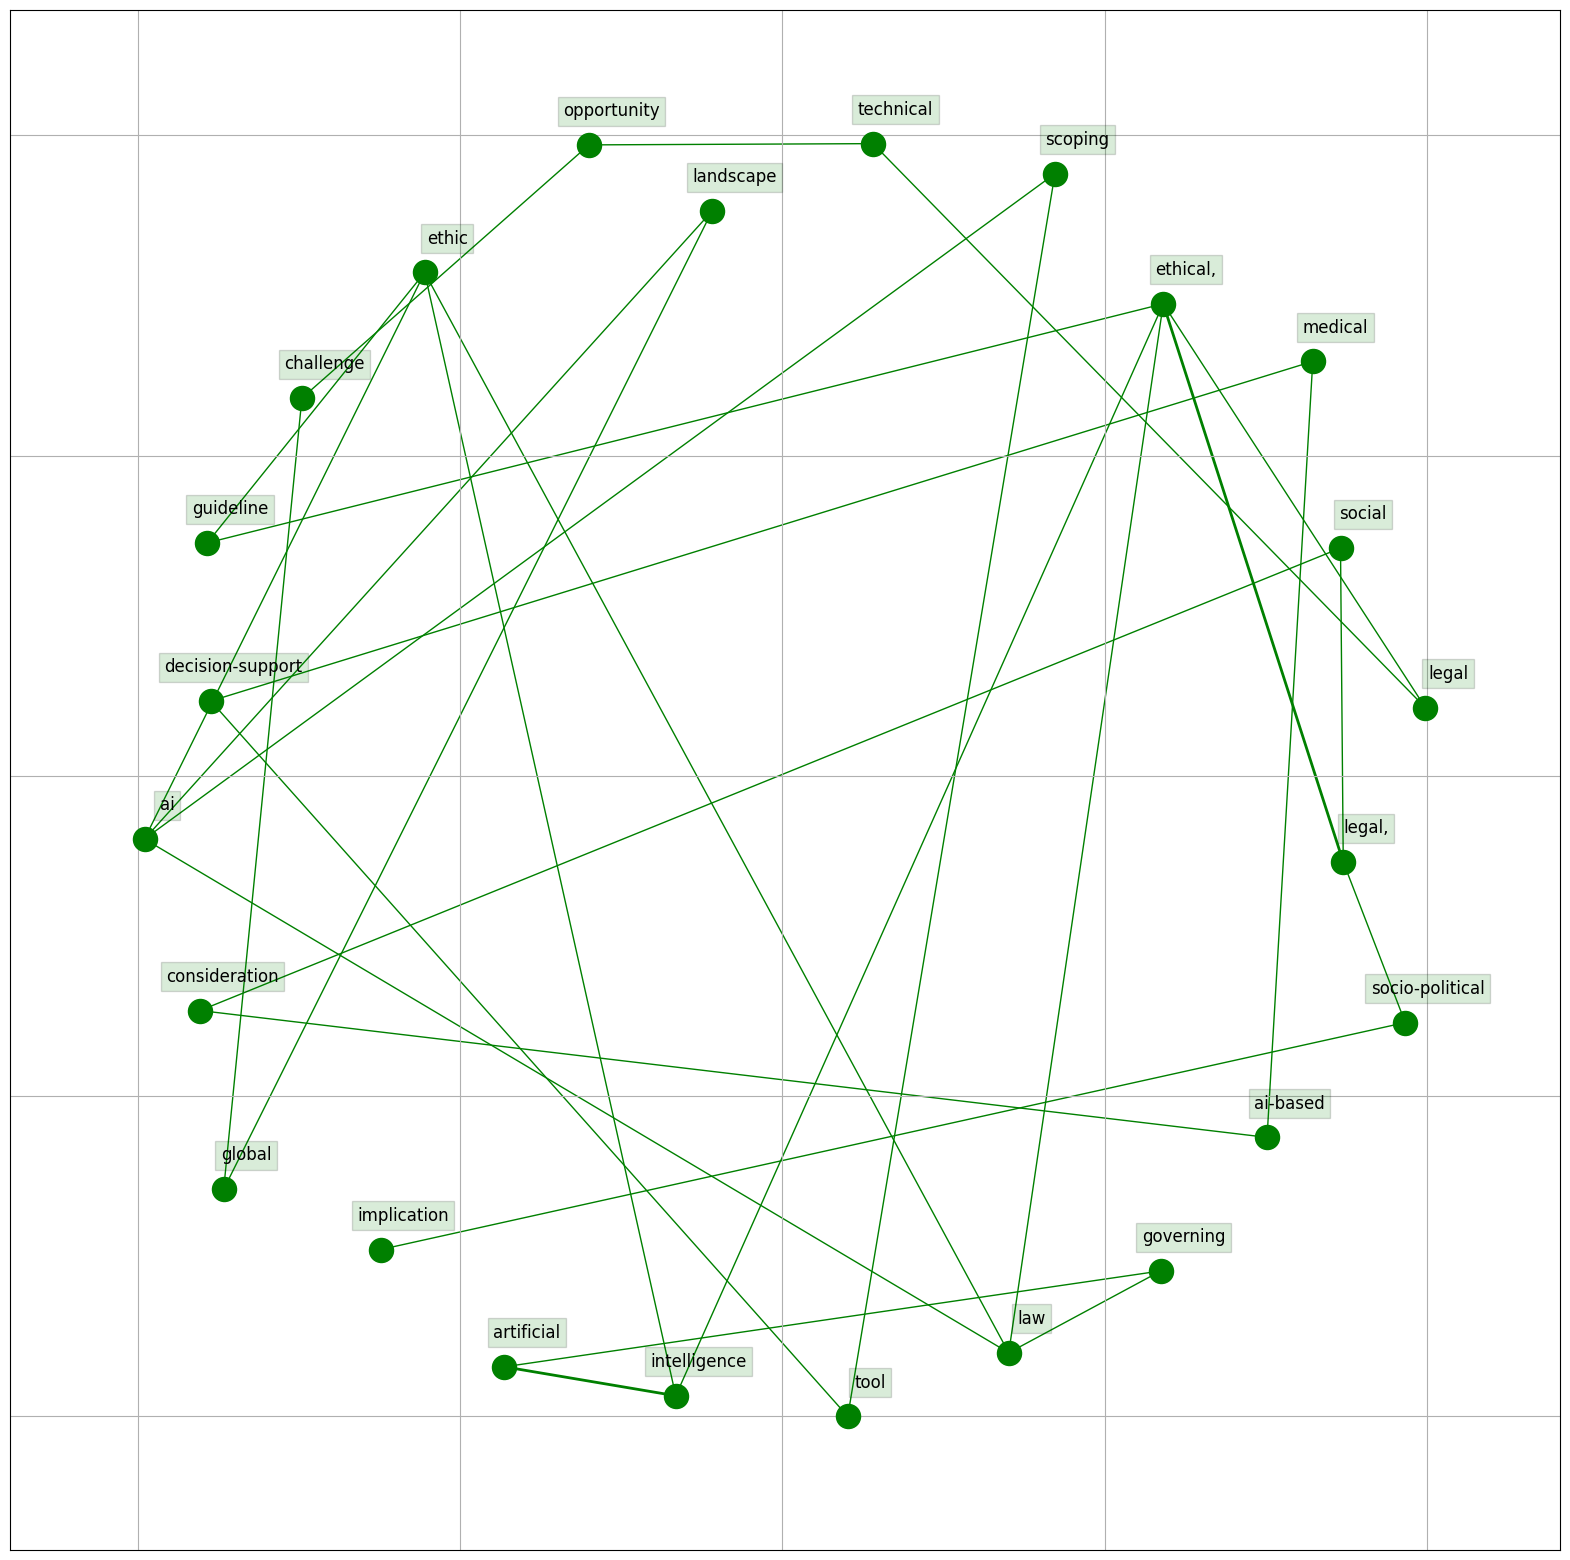

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))

pos = nx.spring_layout(G, k=10)
edgewidth = [d['weight'] for (u,v,d) in G.edges(data=True)]


# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=edgewidth,
                 edge_color='green',
                 node_color='green',
                 with_labels = False,
                 ax=ax)
plt.grid(None)
# Create offset labels
for key, value in pos.items():
    x, y = value[0]+0.035, value[1]+0.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='green', alpha=0.15),
            horizontalalignment='center', fontsize=12)
plt.show()

In [ ]:
import igviz as ig

In [ ]:
import os

new_path = "figures/title_bigram.html"
os.makedirs(os.path.dirname(new_path), exist_ok=True)

In [ ]:
fig = ig.plot(
    G,
    node_opacity=0.8,
)
fig.update_layout(
    dict(
        width=800,
        height=600,
    )
)

with open('figures/title_bigram.html', 'w') as f:
    f.write(fig.to_html())

fig.show()
fig.write_html("figures/title_bigram.html")

<ipython-input-90-360256bff3c0>:1: DeprecationWarning:

Argument `titlefont_size` is deprecated and will be removed in 0.6.0.



## 2.2. Abstract

In [ ]:
df_Abstract = df['Abstract'].str.lower()

In [ ]:
Abstract = ('. '.join(list(df_Abstract.values)))
Abstract = regex.sub(r'\b[0-9]+\b\W*', '', Abstract)
Abstract = regex.sub(r'(?:^| )\w(?:$| )', ' ', Abstract)
Abstract =Abstract.replace(":"," ")
Abstract =Abstract.replace("."," ")
Abstract =Abstract.replace("?"," ")
Abstract =Abstract.replace("("," ")
Abstract =Abstract.replace(")"," ")
Abstract =Abstract.replace('"'," ")
Abstract =Abstract.replace(','," ")
Abstract

"ai is the subject of wide-ranging debate in which there is growing concern about its ethical and legal aspects  frequently  the two are mixed and confused despite being different issues and areas of knowledge  the ethical debate raises two main problems  the first  conceptual  relates to the idea and content of ethics; the second  functional  concerns its relationship with law  both establish models of social behaviour  but they are different in scope and nature  the juridical analysis is based on non-formalistic scientific methodology  this means that it is necessary to consider the nature and characteristics of the ai as preliminary step to the definition of its legal paradigm  in this regard  there are two main issues  the relationship between artificial and human intelligence and the question of the unitary or diverse nature of the ai  from that theoretical and practical basis  the study of the legal system is carried out by examining its foundations  the governance model and the 

In [ ]:
def remove_url(txt):
    url_pattern = regex.compile(r'https?://\S+|www\.\S+')
    no_url = url_pattern.sub(r'', txt)

    return no_url


def stem_tokens(tokens):
    stemmer = nltk.stem.PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens


def lemmatize_tokens(tokens):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

In [ ]:
text_no_urls = remove_url(Abstract)
text_no_urls = text_no_urls.encode('utf-8', errors='ignore').decode('utf-8')
words_in_text = text_no_urls.split()

In [ ]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
lemmatizer = WordNetLemmatizer()
words_nsw= [lemmatizer.lemmatize(w) for w in words_in_text]
words_nsw = [
    word for word in words_nsw if word not in string.punctuation]
words_nsw

['ai',
 'is',
 'the',
 'subject',
 'of',
 'wide-ranging',
 'debate',
 'in',
 'which',
 'there',
 'is',
 'growing',
 'concern',
 'about',
 'it',
 'ethical',
 'and',
 'legal',
 'aspect',
 'frequently',
 'the',
 'two',
 'are',
 'mixed',
 'and',
 'confused',
 'despite',
 'being',
 'different',
 'issue',
 'and',
 'area',
 'of',
 'knowledge',
 'the',
 'ethical',
 'debate',
 'raise',
 'two',
 'main',
 'problem',
 'the',
 'first',
 'conceptual',
 'relates',
 'to',
 'the',
 'idea',
 'and',
 'content',
 'of',
 'ethics;',
 'the',
 'second',
 'functional',
 'concern',
 'it',
 'relationship',
 'with',
 'law',
 'both',
 'establish',
 'model',
 'of',
 'social',
 'behaviour',
 'but',
 'they',
 'are',
 'different',
 'in',
 'scope',
 'and',
 'nature',
 'the',
 'juridical',
 'analysis',
 'is',
 'based',
 'on',
 'non-formalistic',
 'scientific',
 'methodology',
 'this',
 'mean',
 'that',
 'it',
 'is',
 'necessary',
 'to',
 'consider',
 'the',
 'nature',
 'and',
 'characteristic',
 'of',
 'the',
 'ai',
 'a

In [ ]:
stop_words = stopwords.words('english')
stop_words.extend([',','survey',':','A','on','in','into','the','for','review','.','SOK:','Sok:','(sok).'])
words_nsw = [word for word in words_nsw if not word in stop_words]
words_nsw = [ele for ele in words_nsw if len(ele) < 20]
words_nsw = [word for word in words_nsw if not word in ['An','SOK','How','sok','e','g','drb','ha']]
words_nsw

['ai',
 'subject',
 'wide-ranging',
 'debate',
 'growing',
 'concern',
 'ethical',
 'legal',
 'aspect',
 'frequently',
 'two',
 'mixed',
 'confused',
 'despite',
 'different',
 'issue',
 'area',
 'knowledge',
 'ethical',
 'debate',
 'raise',
 'two',
 'main',
 'problem',
 'first',
 'conceptual',
 'relates',
 'idea',
 'content',
 'ethics;',
 'second',
 'functional',
 'concern',
 'relationship',
 'law',
 'establish',
 'model',
 'social',
 'behaviour',
 'different',
 'scope',
 'nature',
 'juridical',
 'analysis',
 'based',
 'non-formalistic',
 'scientific',
 'methodology',
 'mean',
 'necessary',
 'consider',
 'nature',
 'characteristic',
 'ai',
 'preliminary',
 'step',
 'definition',
 'legal',
 'paradigm',
 'regard',
 'two',
 'main',
 'issue',
 'relationship',
 'artificial',
 'human',
 'intelligence',
 'question',
 'unitary',
 'diverse',
 'nature',
 'ai',
 'theoretical',
 'practical',
 'basis',
 'study',
 'legal',
 'system',
 'carried',
 'examining',
 'foundation',
 'governance',
 'model',

In [ ]:
bigram = list(nltk.bigrams(words_nsw))
bigram_counts = collections.Counter(bigram).most_common(100)

In [ ]:
abstract_bigram=pd.DataFrame(bigram_counts)
abstract_bigram.columns = ['bigram', 'counts']
abstract_bigram = abstract_bigram.sort_values(by=['counts'], ascending=False)
abstract_bigram.head(25)

bigram  counts
0   (artificial, intelligence)       5
1           (intelligence, ai)       4
2             (ethical, legal)       3
3                  (two, main)       2
4             (special, issue)       2
5        (recent, development)       2
6             (ai, governance)       2
7       (principle, guideline)       2
8         (guideline, ethical)       2
70         (artificial, human)       1
67               (main, issue)       1
68       (issue, relationship)       1
69  (relationship, artificial)       1
74          (unitary, diverse)       1
71       (human, intelligence)       1
72    (intelligence, question)       1
73         (question, unitary)       1
65          (paradigm, regard)       1
66               (regard, two)       1
61         (preliminary, step)       1
64           (legal, paradigm)       1
63         (definition, legal)       1
62          (step, definition)       1
76                (nature, ai)       1
60           (ai, preliminary)       1

In [ ]:
print(abstract_bigram.head(90).to_latex(index=False)) 

\begin{tabular}{lr}
\toprule
                       bigram &  counts \\
\midrule
   (artificial, intelligence) &       5 \\
           (intelligence, ai) &       4 \\
             (ethical, legal) &       3 \\
                  (two, main) &       2 \\
             (special, issue) &       2 \\
        (recent, development) &       2 \\
             (ai, governance) &       2 \\
       (principle, guideline) &       2 \\
         (guideline, ethical) &       2 \\
          (artificial, human) &       1 \\
                (main, issue) &       1 \\
        (issue, relationship) &       1 \\
   (relationship, artificial) &       1 \\
           (unitary, diverse) &       1 \\
        (human, intelligence) &       1 \\
     (intelligence, question) &       1 \\
          (question, unitary) &       1 \\
           (paradigm, regard) &       1 \\
                (regard, two) &       1 \\
          (preliminary, step) &       1 \\
            (legal, paradigm) &       1 \\
          (defin

<ipython-input-100-84cfb0cbda73>:1: FutureWarning:

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.



In [ ]:
print(abstract_bigram.head(25).to_markdown(index=False))

| bigram                         |   counts |
|:-------------------------------|---------:|
| ('artificial', 'intelligence') |        5 |
| ('intelligence', 'ai')         |        4 |
| ('ethical', 'legal')           |        3 |
| ('two', 'main')                |        2 |
| ('special', 'issue')           |        2 |
| ('recent', 'development')      |        2 |
| ('ai', 'governance')           |        2 |
| ('principle', 'guideline')     |        2 |
| ('guideline', 'ethical')       |        2 |
| ('artificial', 'human')        |        1 |
| ('main', 'issue')              |        1 |
| ('issue', 'relationship')      |        1 |
| ('relationship', 'artificial') |        1 |
| ('unitary', 'diverse')         |        1 |
| ('human', 'intelligence')      |        1 |
| ('intelligence', 'question')   |        1 |
| ('question', 'unitary')        |        1 |
| ('paradigm', 'regard')         |        1 |
| ('regard', 'two')              |        1 |
| ('preliminary', 'step')        |

In [ ]:
abstract_bigram.to_csv("abstract_bigram.csv")

In [ ]:
# Create dictionary of bigrams and their counts
d = abstract_bigram.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()
# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=v/10000)
G.remove_nodes_from(["pfv", "tag"])

In [ ]:
G = nx.Graph()
for edge in bigram_counts:
    link = edge[0]
    count = edge[1]
    
    G.add_edge(link[0], link[1], weight=count/10)

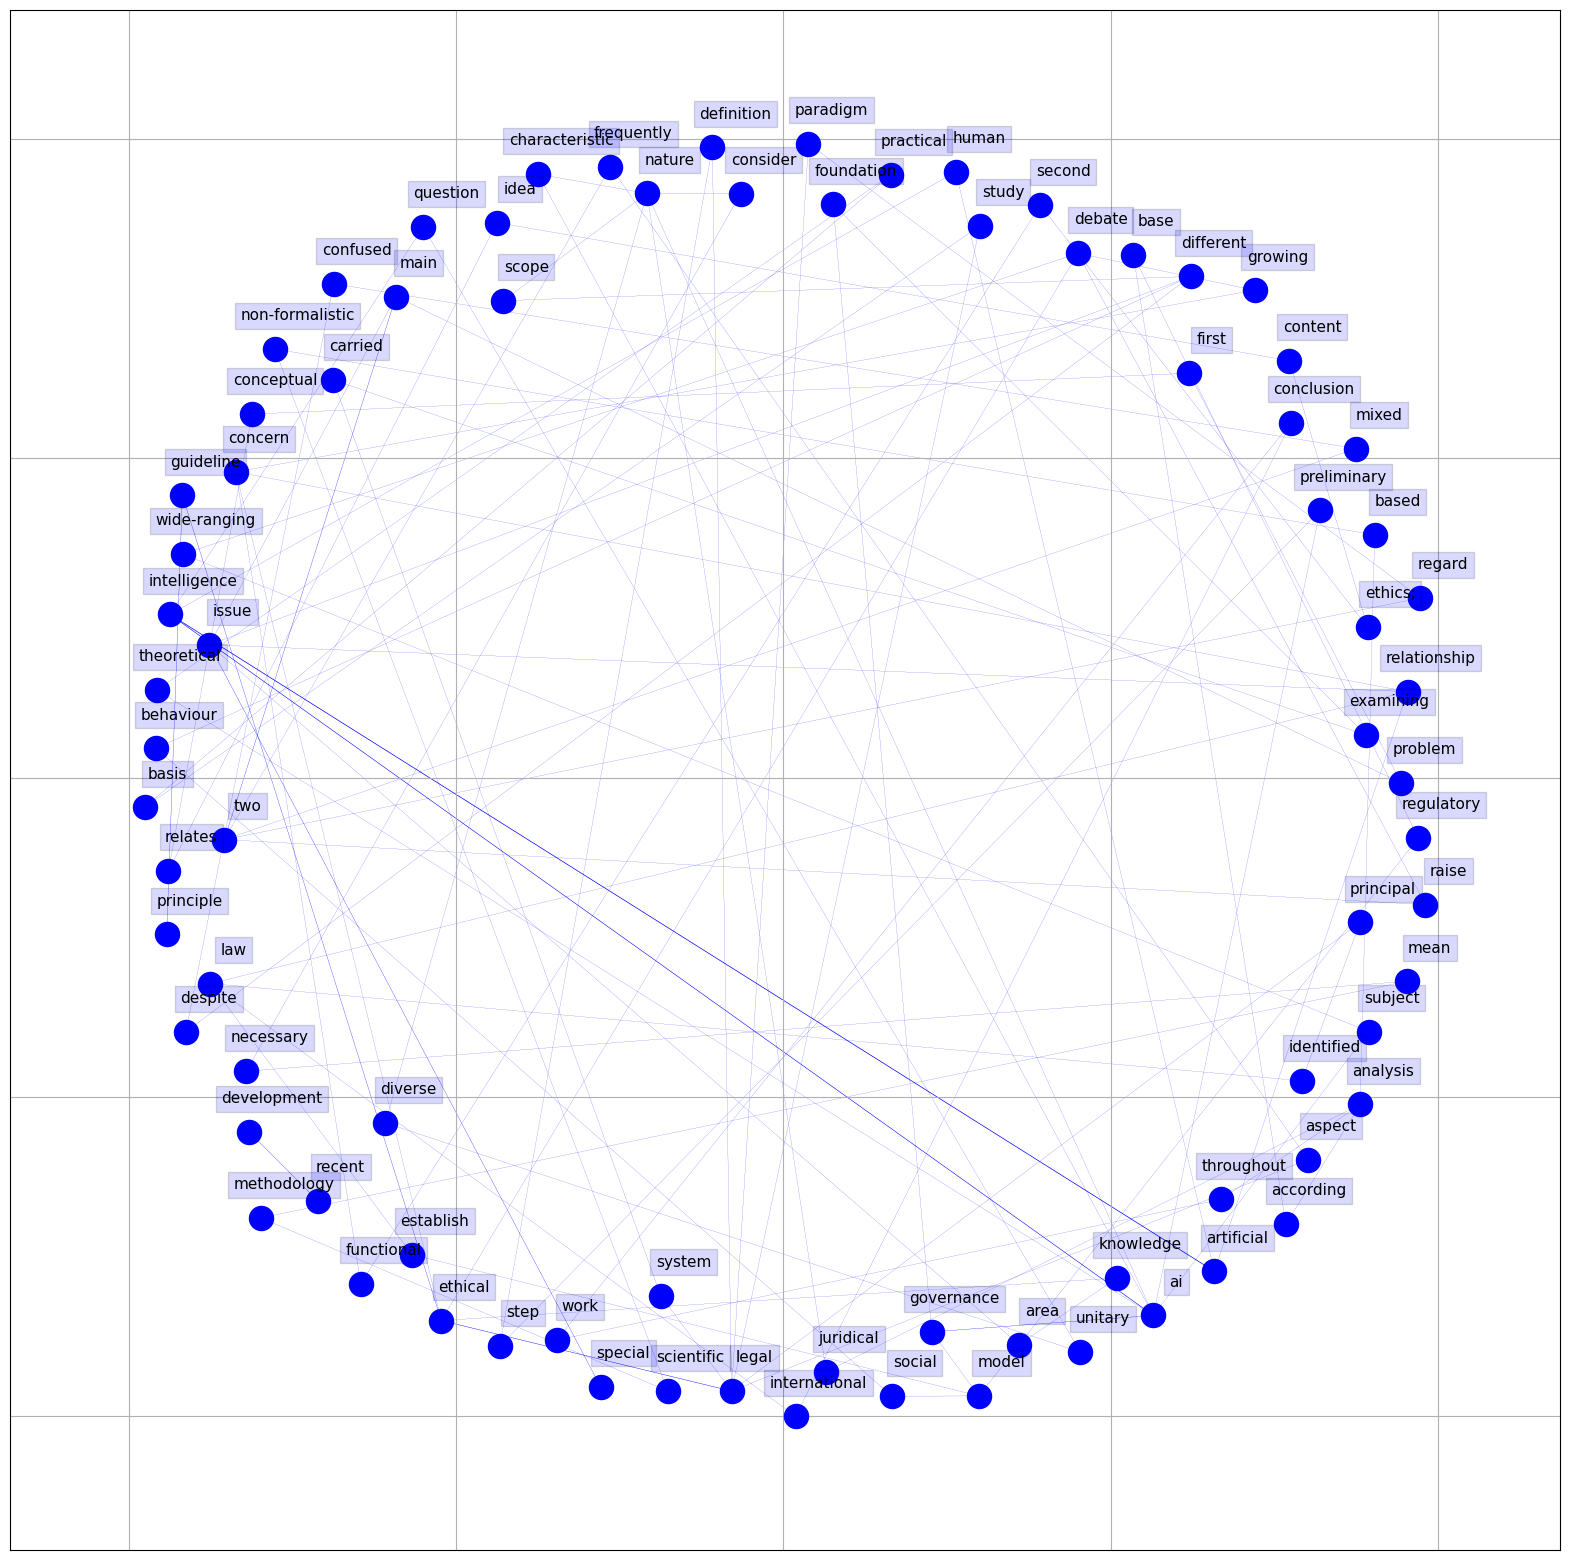

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))

pos = nx.spring_layout(G, k=10)
edgewidth = [d['weight'] for (u,v,d) in G.edges(data=True)]


# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=edgewidth,
                 edge_color='blue',
                 node_color='blue',
                 with_labels = False,
                 ax=ax)
plt.grid(None)
# Create offset labels
for key, value in pos.items():
    x, y = value[0]+0.035, value[1]+0.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='blue', alpha=0.15),
            horizontalalignment='center', fontsize=11)
    
plt.show()

In [ ]:
import os

new_path = "figures/Abstract_bigram.html"
os.makedirs(os.path.dirname(new_path), exist_ok=True)

In [ ]:
fig = ig.plot(
    G,
    node_opacity=0.8,
)
fig.update_layout(
    dict(
        width=800,
        height=600,
    )
)

with open('figures/Abstract_bigram.html', 'w') as f:
    f.write(fig.to_html())

fig.show()
fig.write_html("figures/Abstract_bigram.html")

<ipython-input-107-017664b3c192>:1: DeprecationWarning:

Argument `titlefont_size` is deprecated and will be removed in 0.6.0.

